<h1 align="Center"> University Enrollement Contribution </h1>
<hr>
<h2 align="right"> Work Done By : <br> Wissem Bellara </h2>

<h3> I. Business Understanding </h3>

The university started offering online courses to reach a wider range of students.
The university wants you to help them understand enrollment trends.
They would like you to identify what contributes to higher enrollment. In particular, whether
the course type (online or classroom) is a factor.

<h3> II. Data Understanding </h3>

<h4> 1. Data Exploring </h4>

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import re

In [4]:
df=pd.read_csv('./university_enrollment_2306.csv') #Importing Data

In [5]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [6]:
df.columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department'],
      dtype='object')

In [7]:
df.shape 

(1850, 8)

In [8]:
df.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [10]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

Our Dataset presents 1850 instances and 8 columns which are the following : 
<ol>
<li>course_id : Nominal. The unique identifier of the course.</li>
<li>course_type : Nominal. Whether the course is “online” or “classroom” based.</li>
<li>year : Discrete. The year the course was offerered. Any year from 2011 to 2022</li>
<li>enrollment_count : Discrete. The number of students enrolled onto the course. </li>
<li>pre_score : Continuous. The average score of the enrolled students on the pre
course exam.</li>
<li>post_score : Continuous. The average score of students who complete the course on the post course exam. It presents 185 Null values </li>
<li>pre_requirement : Nominal. The previous course completion requirement for students to enroll. One of “None”, “Beginner”, “Intermediate”. It presents 891 Null values </li>
<li>department : Nominal. The department of the university offering the course. One of “Science”, “Technology”, “Engineering”, “Mathematics </li>
</ol>

<AxesSubplot: >

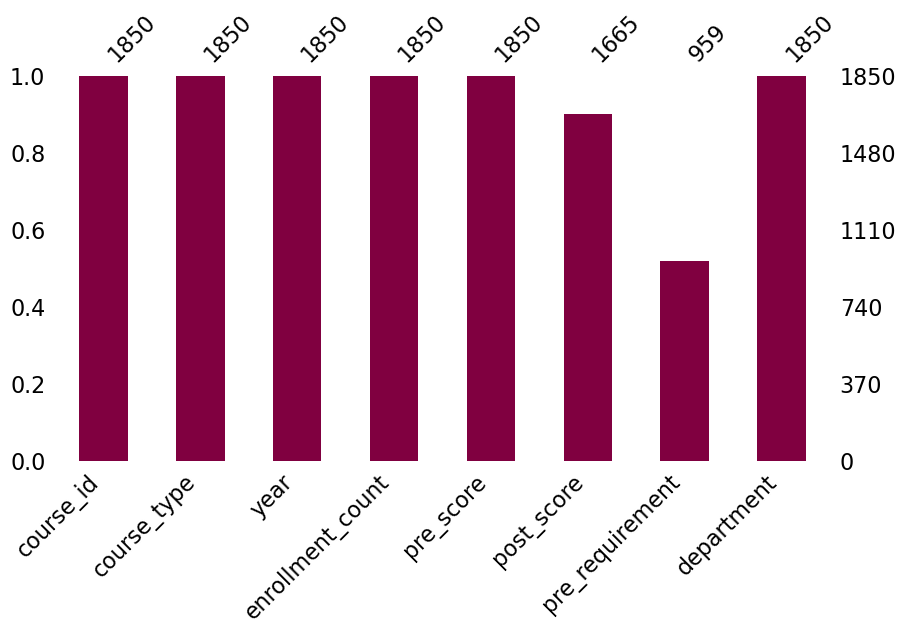

In [11]:
missingno.bar(df,color=(0.5,0,0.25) , figsize= (10,5))

<h3> III. Data Cleaning and Preprocessing </h3>

<h4> 1. Checking for incoherent data </h4>

In [12]:
print(df.course_id.duplicated().value_counts())

course_id
False    1850
Name: count, dtype: int64


In [13]:
print(df.course_type.value_counts(dropna=False))

course_type
online       1375
classroom     475
Name: count, dtype: int64


In [14]:
print(df.year.value_counts(dropna=False))

year
2013    169
2012    164
2016    162
2015    160
2021    159
2018    156
2014    152
2022    150
2011    148
2019    147
2017    143
2020    140
Name: count, dtype: int64


In [15]:
print(df.enrollment_count.value_counts(dropna=False))

enrollment_count
261    444
251    276
256    169
241    137
246    112
170     92
165     87
180     73
175     70
155     64
231     45
257     43
236     34
185     29
266     27
247     18
255     16
181     11
252     10
160     10
242     10
190      8
171      7
245      6
156      5
232      5
237      5
169      4
161      4
248      4
258      3
267      3
240      2
235      2
182      2
176      2
179      2
159      2
238      1
154      1
250      1
249      1
166      1
164      1
262      1
Name: count, dtype: int64


In [16]:
print(df.pre_score.value_counts(dropna=False))

pre_score
-        130
12.11      3
51.95      3
18.01      3
23.66      3
        ... 
13.76      1
33.47      1
18.42      1
8.23       1
17.57      1
Name: count, Length: 1594, dtype: int64


We need to change the '-' symbol to be considered as Null 

In [17]:
df['pre_score'][df.pre_score.apply(lambda x: re.search("^\d",str(x))==None)]

15      -
22      -
26      -
27      -
31      -
       ..
1768    -
1771    -
1807    -
1811    -
1844    -
Name: pre_score, Length: 130, dtype: object

In [18]:
df['pre_score']=df.pre_score.replace('-',np.nan)

In [19]:
df.pre_score=df.pre_score.astype('float64')

In [20]:
df.dtypes

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object

In [21]:
print(df.post_score.value_counts(dropna=False))

post_score
NaN      185
72.0      82
76.0      78
79.0      77
73.0      74
80.0      74
71.0      72
77.0      72
81.0      72
75.0      68
74.0      67
78.0      67
68.0      66
69.0      64
66.0      59
70.0      55
67.0      54
82.0      54
86.0      42
84.0      42
83.0      38
65.0      36
87.0      33
85.0      32
61.0      31
63.0      30
62.0      26
89.0      25
64.0      24
88.0      18
90.0      17
60.0      16
92.0      13
59.0      12
57.0      10
98.0      10
94.0       9
55.0       7
95.0       6
96.0       5
93.0       5
97.0       4
91.0       4
58.0       3
56.0       2
54.0       2
51.0       1
105.0      1
99.0       1
100.0      1
53.0       1
102.0      1
101.0      1
103.0      1
Name: count, dtype: int64


In [22]:
df['post_score'][df.post_score.apply(lambda x: re.search("^\d",str(x))==None)]

20     NaN
33     NaN
40     NaN
61     NaN
94     NaN
        ..
1795   NaN
1799   NaN
1801   NaN
1812   NaN
1822   NaN
Name: post_score, Length: 185, dtype: float64

In [23]:
df.pre_requirement.value_counts(dropna=False)

pre_requirement
NaN             891
Beginner        654
Intermediate    305
Name: count, dtype: int64

In [24]:
df.department.value_counts(dropna=False)

department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64

In [25]:
df.department.replace('Math' , 'Mathematics' , inplace=True)

In [26]:
df.department.value_counts(dropna=False)

department
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: count, dtype: int64

The course_id column only has unique values.
The course type column has values which are either "online" or "classroom". 
The year column has values ranging from 2011 to 2022. 
The enrollment_count column has discrete values. 
The department column had the value "Math" and "Mathematics" which were grouped into the value "Math" to match the description given. 

All values of all columns now match the description given in the table

<h4> 2. Replacing Missing values </h4>

In [27]:
df.pre_score.fillna(0,inplace=True) #Replace missing values with 0.

In [28]:
df.post_score.fillna(0,inplace=True) #Replace missing values with 0.

In [29]:
df.pre_requirement.fillna("None",inplace=True)

In [30]:
df.isnull().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

<h4> 3. Data Visualisation </h4> 

Text(0.5, 9.444444444444438, 'Enrollments')

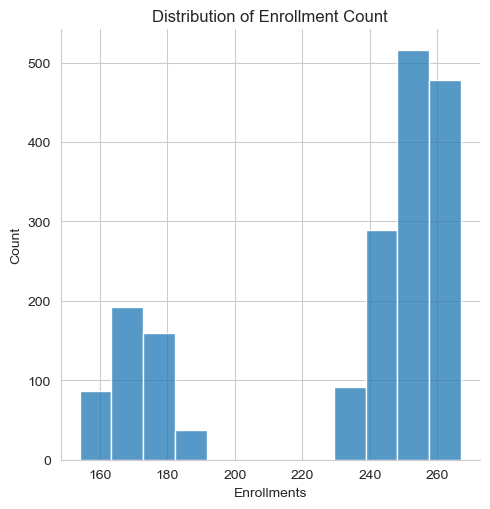

In [31]:
sns.set_style('whitegrid')
sns.displot(data=df,x='enrollment_count')
plt.title('Distribution of Enrollment Count')
plt.xlabel('Enrollments')

The distribution is very disperse where the max is for enrollement = 250 and the lowest are for values between 190 and 230 with 0 enrollements

Text(0.5, 1.0, 'Number of courses by type')

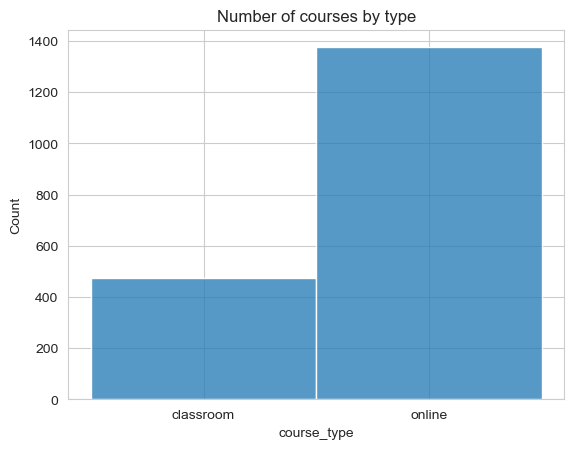

In [32]:
sns.histplot(data=df,x="course_type")
plt.title('Number of courses by type')

a. Online courses have more the most observations <br>
b. The observations are not balanced across the course types because Online courses has way more observations and it's not even close

<AxesSubplot: xlabel='course_type', ylabel='enrollment_count'>

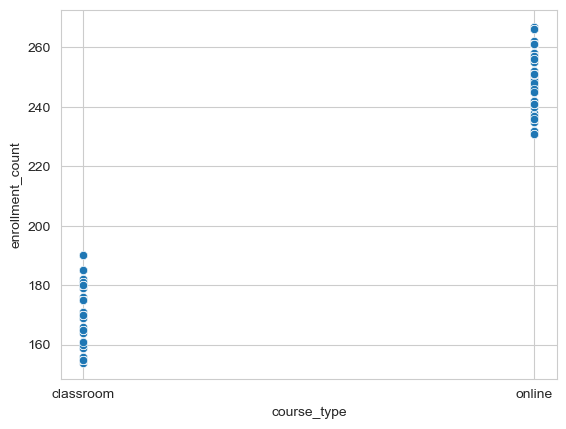

In [33]:
sns.scatterplot(df,x="course_type", y="enrollment_count")

The "online" type has more enrollment_count than the "classroom" type 

<h3> IV. Modeling </h3>

We want to predict how many students will enroll. Therefore we're trying to guess a number. It's a regression problem (Supervised Learning)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

In [35]:
df_Encoded=df.copy()

In [36]:
lb=LabelEncoder()
df_Encoded['course_type']=lb.fit_transform(df['course_type'])
df_Encoded['pre_requirement']=lb.fit_transform(df['pre_requirement'])
df_Encoded['department']=lb.fit_transform(df['department'])

In [37]:
ss=StandardScaler()
df_scaled = df_Encoded.copy()
df_scaled[["year", "pre_score", "post_score"]]=ss.fit_transform(df_Encoded[["year", "pre_score", "post_score"]])

In [38]:
df_scaled

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,0,0.457226,165,-0.586208,0.221836,0,2
1,2,0,1.037383,175,1.101017,0.764356,2,2
2,3,1,-0.122930,257,0.366416,0.513962,2,1
3,4,1,-0.993165,251,1.689941,0.305300,0,3
4,5,0,0.747304,165,-0.206141,0.347033,0,2
...,...,...,...,...,...,...,...,...
1845,1846,0,0.457226,155,0.457095,0.555695,1,2
1846,1847,1,-0.122930,261,1.578638,0.722624,2,3
1847,1848,1,-1.573322,257,0.980547,0.555695,2,1
1848,1849,1,-0.993165,256,-0.830748,-0.070291,2,1


In [39]:
y=df_scaled['enrollment_count']
X=df_scaled.drop(['enrollment_count','course_id'],axis=1)

In [40]:
x_train , x_test  , y_train , y_test=train_test_split(X,y,test_size=0.3, random_state=42)

<h4> 1. Linear Regression

In [41]:
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [42]:
LinReg_pred=LinReg.predict(x_test)

In [48]:
print ("R2 score : {} \nMSE Score : {} ".format(r2_score(y_test,LinReg_pred)*100 ,MSE (y_test,LinReg_pred) ))

R2 score : 95.6613125710979 
MSE Score : 56.60495425737754 


In [49]:
MSE (y_test,LinReg_pred)

56.60495425737754

<h4> 2. Random Forest Regressor

In [50]:
ForReg=RandomForestRegressor(n_estimators=100)

In [51]:
ForReg.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
ForReg_pred=ForReg.predict(x_test)

In [55]:
print ("R2 score : {} \nMSE Score : {} ".format(r2_score(y_test,ForReg_pred)*100 ,MSE (y_test,ForReg_pred) ))

R2 score : 99.99080574021507 
MSE Score : 0.11995347972972913 


I chose the LinearRegression and RandomForestRegression models as they are the most known models to for regression and they're the most appropriate 

The RandomForestRegressor presents less Mean squared error and a higher R2 score therefore it is more accurate and better using these scores. 